In [55]:
%matplotlib inline
import pylab as pl

In [56]:
import pyspeckit

In [57]:
source_size =  4.3350376922e+00
tkin = 7.9842254347e+01
Ntot = 3.7061155735e+17
vwidth_fwhm = 4.2101396644e+00
vwidth = vwidth_fwhm / np.sqrt(8*np.log(2))
vcen = -7.9000000000e+00

# define min. freq. (in MHz)
FreqMin = 215764.24
# define max. freq. (in MHz)
FreqMax = 235471.74

In [58]:
import sys
import os

LocalPath = os.getcwd() + "/"

# get path of XCLASS directory
XCLASSRootDir = str(os.environ.get('XCLASSRootDir', '')).strip()
XCLASSRootDir = os.path.normpath(XCLASSRootDir) + "/"

# extend sys.path variable
NewPath = XCLASSRootDir + "build_tasks/"
if (not NewPath in sys.path):
    sys.path.append(NewPath)

import task_myXCLASS

###########################################################################
# TO MODIFY BY THE USER

# define path and name of molfit file
#DEFAULT MolfitsFileName = LocalPath + "files/my_molecules.molfit"
MolfitsFileName = LocalPath + 'CH3OH_pure.molfit'

with open(MolfitsFileName, 'w') as fh:
    fh.write(f"""%============================================================================================================================
%
% define molecules and their components:
%
%============================================================================================================================
%    source size:                 T_kin:               N_tot:            V_width:                V_off:   CFFlag:    keyword:
%       [arcsec]:                   [K]:              [cm-2]:            [km /s]:              [km /s]:       []:         []:
CH3OH;v=0;           1
 {source_size}       {tkin}     {Ntot}     {vwidth_fwhm}    {vcen}         c
""")



# define freq. step (in MHz)
FreqStep = 0.1

# depending on parameter "Inter_Flag" define beam size (in arcsec)
# (Inter_Flag = True) or size of telescope (in m) (Inter_Flag = False)
TelescopeSize = 1000.0 # meters

# define beam minor axis length (in arsec)
BMIN = None

# define beam major axis length (in arsec)
BMAJ = None

# define beam position angle (in degree)
BPA = None

# interferrometric data?
Inter_Flag = False

# define red shift
Redshift = None

# BACKGROUND: describe continuum with tBack and tslope only
t_back_flag = True

# BACKGROUND: define background temperature (in K)
tBack = 0.0

# BACKGROUND: define temperature slope (dimensionless)
tslope = 0.0

# BACKGROUND: define path and name of ASCII file describing continuum as function
#             of frequency
BackgroundFileName = ""

# DUST: define hydrogen column density (in cm^(-2))
N_H = 1.e22

# DUST: define spectral index for dust (dimensionless)
beta_dust = 0.0

# DUST: define kappa at 1.3 mm (cm^(2) g^(-1))
kappa_1300 = 0.0

# DUST: define path and name of ASCII file describing dust opacity as
#       function of frequency
DustFileName = ""

# FREE-FREE: define electronic temperature (in K)
Te_ff = None

# FREE-FREE: define emission measure (in pc cm^(-6))
EM_ff = None

# SYNCHROTRON: define kappa of energy spectrum of electrons (electrons m^(−3) GeV^(-1))
kappa_sync = None

# SYNCHROTRON: define magnetic field (in Gauss)
B_sync = None

# SYNCHROTRON: energy spectral index (dimensionless)
p_sync = None

# SYNCHROTRON: thickness of slab (in AU)
l_sync = None

# PHEN-CONT: define phenomenological function which is used to describe
#            the continuum
ContPhenFuncID = None

# PHEN-CONT: define first parameter for phenomenological function
ContPhenFuncParam1 = None

# PHEN-CONT: define second parameter for phenomenological function
ContPhenFuncParam2 = None

# PHEN-CONT: define third parameter for phenomenological function
ContPhenFuncParam3 = None

# PHEN-CONT: define fourth parameter for phenomenological function
ContPhenFuncParam4 = None

# PHEN-CONT: define fifth parameter for phenomenological function
ContPhenFuncParam5 = None

# use iso ratio file?
iso_flag = False

# define path and name of iso ratio file
#DEFAULT IsoTableFileName = LocalPath + "files/my_isonames.txt"
IsoTableFileName = LocalPath + "my_isonames.txt"

# define path and name of file describing Non-LTE parameters
CollisionFileName = ""

# define number of pixels in x-direction (used for sub-beam description)
NumModelPixelXX = 100

# define number of pixels in y-direction (used for sub-beam description)
NumModelPixelYY = 100

# take local-overlap into account or not
LocalOverlapFlag = False

# disable sub-beam description
NoSubBeamFlag = True

# define path and name of database file
dbFilename = ""

# define rest freq. (in MHz)
RestFreq = 0.0

# define v_lsr (in km/s)
vLSR = 0.0

In [59]:
modeldata, log, TransEnergies, IntOpt, JobDir = task_myXCLASS.myXCLASS(
                                            FreqMin, FreqMax, FreqStep,
                                            TelescopeSize, BMIN, BMAJ,
                                            BPA, Inter_Flag, Redshift,
                                            t_back_flag, tBack, tslope,
                                            BackgroundFileName,
                                            N_H, beta_dust, kappa_1300,
                                            DustFileName, Te_ff, EM_ff,
                                            kappa_sync, B_sync, p_sync,
                                            l_sync, ContPhenFuncID,
                                            ContPhenFuncParam1,
                                            ContPhenFuncParam2,
                                            ContPhenFuncParam3,
                                            ContPhenFuncParam4,
                                            ContPhenFuncParam5,
                                            MolfitsFileName, iso_flag,
                                            IsoTableFileName,
                                            CollisionFileName,
                                            NumModelPixelXX,
                                            NumModelPixelYY,
                                            LocalOverlapFlag,
                                            NoSubBeamFlag,
                                            dbFilename,
                                            RestFreq, vLSR)


Start function myXCLASS:


Creating job directory for function myXCLASS: /orange/adamginsburg/software/XCLASS-Interface/run/myXCLASS/job__06-09-2021__09-10-26__145059265/ .. done!

All files of the current myXCLASS run are stored here!


Analyze molfit file .. done!


Check, if names of molecules in molfit file are included in XCLASS database .. done!




Import calculated myXCLASS spectrum .. done!

Read in intensities for each molecule and for each component .. done!

Read in optical depths for each molecule and for each component .. done!

All files of the current myXCLASS run are stored in the job directory /orange/adamginsburg/software/XCLASS-Interface/run/myXCLASS/job__06-09-2021__09-10-26__145059265/!




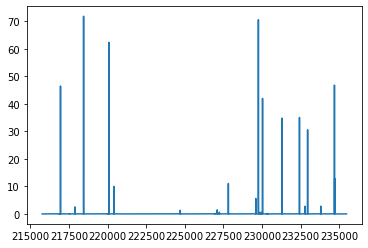

In [60]:
xaxis, yaxis = modeldata.T
pl.plot(xaxis, yaxis)

In [61]:
from astropy import units as u

In [62]:
xclass_spectrum = pyspeckit.Spectrum(xarr=xaxis*u.MHz, data=yaxis*u.K)

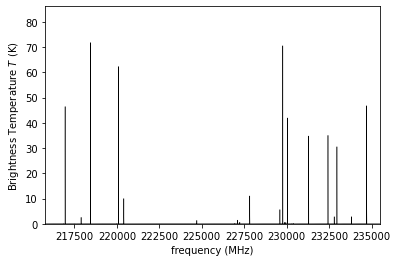

In [63]:
xclass_spectrum.plotter()

In [64]:
from pyspeckit.spectrum.models import lte_molecule
from pyspeckit.spectrum.models.lte_molecule import get_molecular_parameters, generate_model, generate_fitter

In [65]:
Jfreqs, Jaij, Jdeg, JEU, Jpartfunc = get_molecular_parameters('CH3OH',
                                                         catalog='JPL',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_JPL(xarr, vcen, width, tex, column):
    return generate_model(xarr, vcen, width, tex, column, freqs=Jfreqs, aij=Jaij,
                          deg=Jdeg, EU=JEU, partfunc=Jpartfunc)

In [66]:
freqs, aij, deg, EU, partfunc = get_molecular_parameters('CH3OH, vt=0-2',
                                                         catalog='CDMS',
                                                         fmin=FreqMin*u.MHz,
                                                         fmax=FreqMax*u.MHz)
def modfunc_CDMS(xarr, vcen, width, tex, column):
    return generate_model(xarr, vcen, width, tex, column, freqs=freqs, aij=aij,
                          deg=deg, EU=EU, partfunc=partfunc)

divide by zero encountered in true_divide


In [67]:
model_JPL = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_JPL(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot))
model_CDMS = pyspeckit.Spectrum(xarr=xclass_spectrum.xarr, data=modfunc_CDMS(xclass_spectrum.xarr, vcen, vwidth, tkin, Ntot))

(-0.1, 20.0)

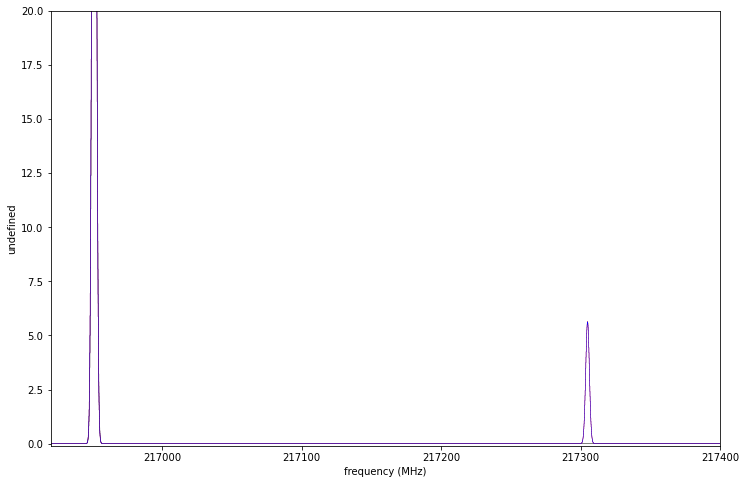

In [68]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(figure=fig)
model_JPL.plotter(clear=False, color='r', axis=xclass_spectrum.plotter.axis)
model_CDMS.plotter(clear=False, color='b', axis=xclass_spectrum.plotter.axis)
xclass_spectrum.plotter.axis.set_xlim(216920, 217400)
xclass_spectrum.plotter.axis.set_ylim(-0.1, 20)

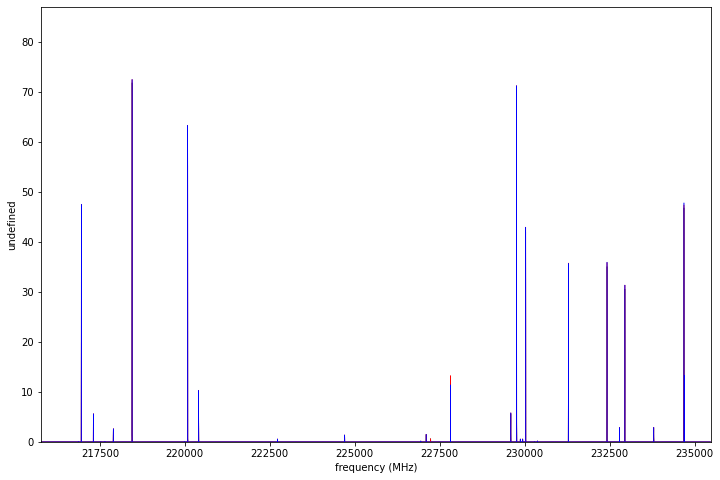

In [69]:
fig = pl.figure(figsize=(12,8))
xclass_spectrum.plotter(figure=fig)
model_JPL.plotter(clear=False, color='r', axis=xclass_spectrum.plotter.axis)
model_CDMS.plotter(clear=False, color='b', axis=xclass_spectrum.plotter.axis)
#xclass_spectrum.plotter.axis.set_xlim(216920, 217400)
#xclass_spectrum.plotter.axis.set_ylim(-0.1, 20)

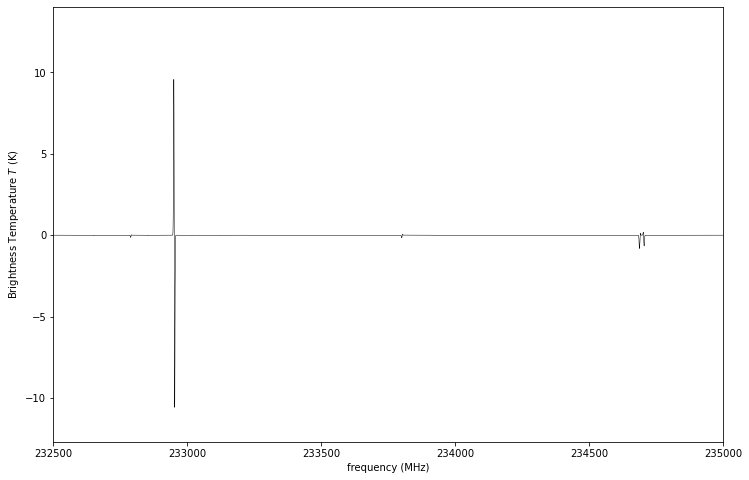

In [70]:
fig = pl.figure(figsize=(12,8))
diff = xclass_spectrum - model_JPL
diff.plotter(figure=fig, xmin=232.5e3, xmax=235e3)

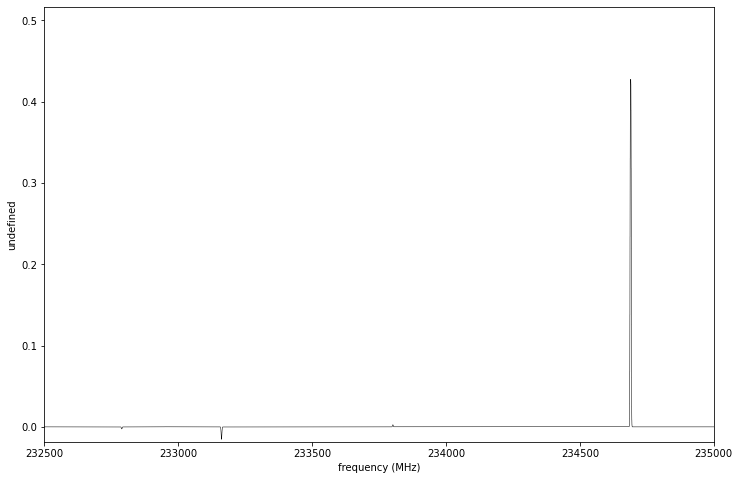

In [71]:
fig = pl.figure(figsize=(12,8))
diff = model_CDMS - model_JPL
diff.plotter(figure=fig, xmin=232.5e3, xmax=235e3)

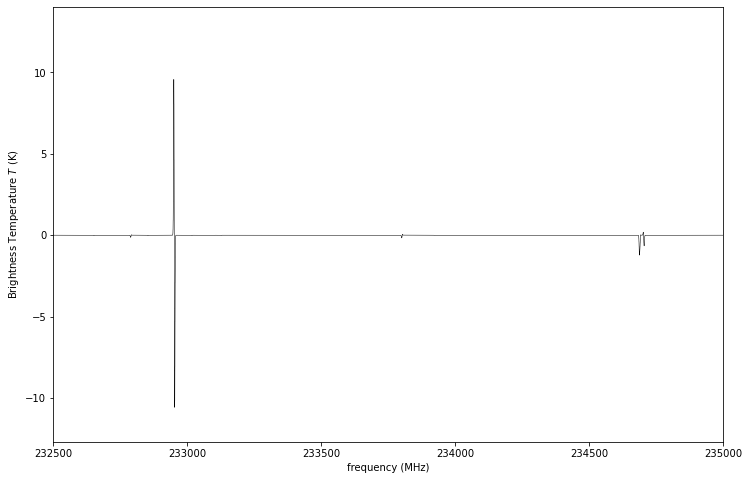

In [72]:
fig = pl.figure(figsize=(12,8))
diff = xclass_spectrum - model_CDMS
diff.plotter(figure=fig, xmin=232.5e3, xmax=235e3)

In [83]:
from astropy.table import Table

In [92]:
xclass_transitions = [{'freq': float(x[0]),
                       'intensity': float(x[2]),
                       'integrated_intensity': float(x[3]),
                       'elow': float(x[4]),
                       'gup': int(float(x[5])),
                       'aij': float(x[6]),
                       'Q': " ".join(x[7:-1]),
                       'name': x[-1]}
                      for x in TransEnergies[1:]]
xctb = Table(xclass_transitions)

In [99]:
len(xctb[xctb['intensity'] > 0])

63

In [96]:
xctb.sort('intensity', reverse=True)

freq,intensity,integrated_intensity,elow,gup,aij,Q,name
float64,float64,float64,float64,int64,float64,str119,str10
218440.05,71.7933788187204,-4515.033948229498,34.97603124914799,36,4.68628e-05,rovibSym = E; ElecStateLabel = X; v12 = 0; J = 4; Ka = 2; K rovibSym = E; ElecStateLabel = X; v12 = 0; J = 3; Ka = 1; K,CH3OH;v=0;
229758.76,70.54310895527144,-4515.033948229498,78.07684283697999,68,4.19123e-05,rovibSym = E; ElecStateLabel = X; v12 = 0; J = 8; Ka = 1; K rovibSym = E; ElecStateLabel = X; v12 = 0; J = 7; Ka = 0; K,CH3OH;v=0;
220078.519,62.31534781897827,-4515.033948229498,86.051658844025,68,2.5157e-05,rovibSym = E; ElecStateLabel = X; v12 = 0; J = 8; Ka = 0; K rovibSym = E; ElecStateLabel = X; v12 = 0; J = 7; Ka = 1; K,CH3OH;v=0;
234683.39,46.77677846210356,-4515.033948229498,49.660044357312,36,1.87404e-05,rovibSym = A2; ElecStateLabel = X; v12 = 0; J = 4; Ka = 2; rovibSym = A2; ElecStateLabel = X; v12 = 0; J = 5; Ka = 1;,CH3OH;v=0;
216945.6,46.4432893848782,-4515.033948229498,45.459443160292,44,1.21348e-05,rovibSym = E; ElecStateLabel = X; v12 = 0; J = 5; Ka = 1; K rovibSym = E; ElecStateLabel = X; v12 = 0; J = 4; Ka = 2; K,CH3OH;v=0;
230027.06,41.95191619204841,-4515.033948229498,28.788402298219,28,1.48598e-05,rovibSym = E; ElecStateLabel = X; v12 = 0; J = 3; Ka = 2; K rovibSym = E; ElecStateLabel = X; v12 = 0; J = 4; Ka = 1; K,CH3OH;v=0;
232418.59,35.03374863792799,-4515.033948229498,154.247224667744,84,1.86753e-05,rovibSym = A1; ElecStateLabel = X; v12 = 0; J = 10; Ka = 2; rovibSym = A1; ElecStateLabel = X; v12 = 0; J = 9; Ka = 3;,CH3OH;v=0;
231281.1,34.79861142477361,-4515.033948229498,154.248043327305,84,1.83137e-05,rovibSym = A2; ElecStateLabel = X; v12 = 0; J = 10; Ka = 2; rovibSym = A2; ElecStateLabel = X; v12 = 0; J = 9; Ka = 3;,CH3OH;v=0;
232945.0,30.53270589184223,-4515.033948229498,179.189459318248,84,2.12674e-05,rovibSym = E; ElecStateLabel = X; v12 = 0; J = 10; Ka = 3; rovibSym = E; ElecStateLabel = X; v12 = 0; J = 11; Ka = 2;,CH3OH;v=0;


In [122]:
def parse_qn(st):
    #print(st)
    entries = [x.split(" = ") for x in st.split(";")]
    #print(entries)
    urslt = {entry[0].lstrip(): entry[1].strip() for entry in entries[:5]}
    lrslt = {entry[0].lstrip(): entry[1].strip() for entry in entries[5:10]}
    #print(urslt, lrslt)
    return urslt, lrslt

Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


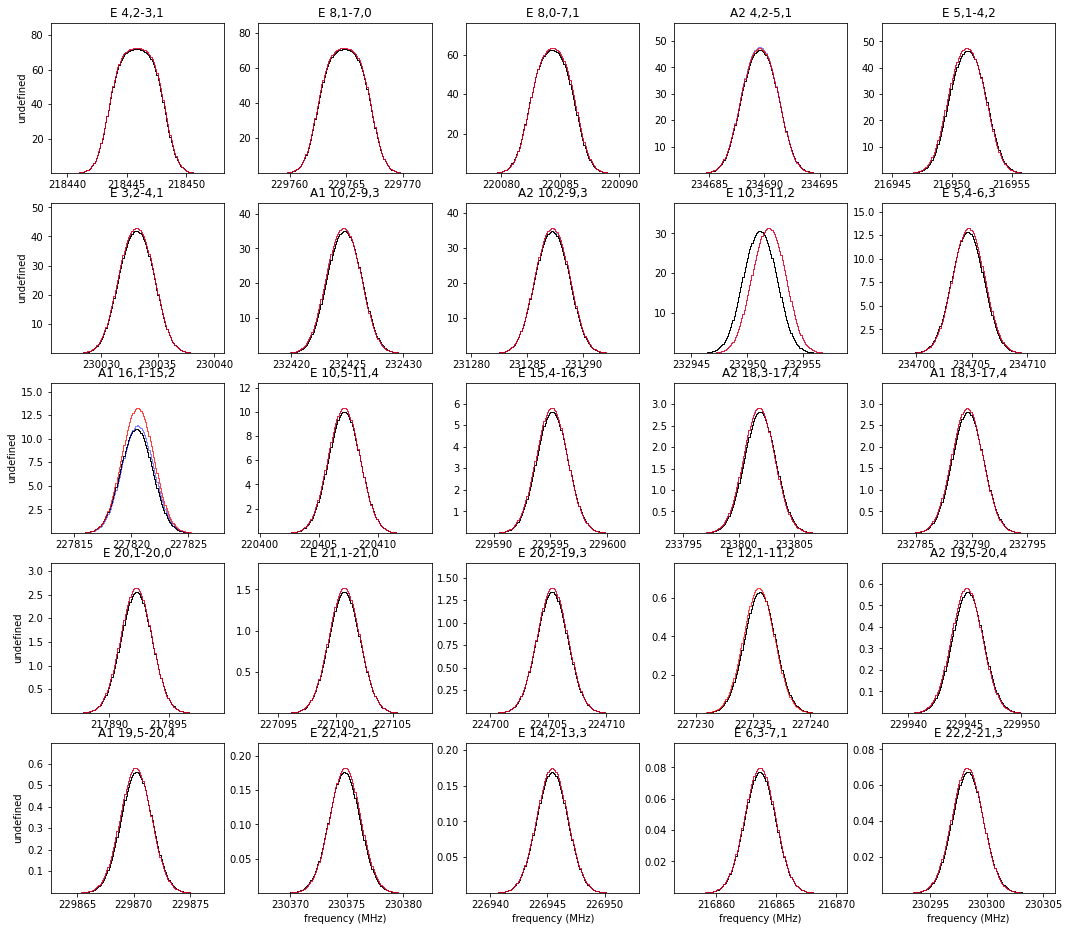

In [123]:
fig = pl.figure(figsize=(18,16))
for ii,row in enumerate(xctb):
    if ii+1 > 25:
        break
    fmin, fmax = row['freq']*(1-2/3e5)*u.MHz, row['freq']*(1+18/3e5)*u.MHz
    ax = pl.subplot(5,5,ii+1)
    
    QN = parse_qn(row['Q'])
    label = f"{QN[0]['rovibSym']} {QN[0]['J']},{QN[0]['Ka']}-{QN[1]['J']},{QN[1]['Ka']}"
    ax.set_title(label)
    
    xclass_spectrum.plotter(axis=ax, clear=False, linewidth=1)
    model_CDMS.plotter(color='b', axis=ax, clear=False, xmin=fmin, xmax=fmax)    
    model_JPL.plotter(color='r', axis=ax, clear=False, xmin=fmin, xmax=fmax, linewidth=0.75)

    if ii % 5 != 0:
        ax.set_ylabel('')
    if ii <= 20:
        ax.set_xlabel('')